# Machine Learning FAIMS
## A very rough draft

### Normalized aa counts, Length and Charge

In [4]:
import pandas as pd
import sklearn

In [5]:
evidence_df = pd.read_csv("NormCountsFeatures_MaxCV.csv", low_memory=False)
evidence_df.head()

,Sequence,Charge,Intensity,Length.x,Max Intensity CV,A.Count,R.Count,N.Count,D.Count,C.Count,...,M.Norm,F.Norm,S.Norm,T.Norm,W.Norm,Y.Norm,V.Norm,U.Norm,O.Norm,P.Norm
0,AAAAAAAAAAAAAAAGAGAGAK,2,548850.0,22,25,18,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0,0.000000
1,AAAAAAAAAAAAAAAGAGAGAK,3,7280200.0,22,45,18,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0,0.000000
2,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,4,12120000.0,52,35,19,1,1,0,0,...,0.0,0.0,0.057692,0.057692,0.0,0.0,0.057692,0,0,0.076923
3,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,5,14383000.0,52,40,19,1,1,0,0,...,0.0,0.0,0.057692,0.057692,0.0,0.0,0.057692,0,0,0.076923
4,AAAAAAAAAVSR,2,14281000.0,12,60,9,1,0,0,0,...,0.0,0.0,0.083333,0.000000,0.0,0.0,0.083333,0,0,0.000000


In [6]:
evidence_df.columns


Index(['Sequence', 'Charge', 'Intensity', 'Length.x', 'Max Intensity CV',
       'A.Count', 'R.Count', 'N.Count', 'D.Count', 'C.Count', 'Q.Count',
       'E.Count', 'G.Count', 'H.Count', 'I.Count', 'L.Count', 'K.Count',
       'M.Count', 'F.Count', 'P.Count', 'S.Count', 'T.Count', 'W.Count',
       'Y.Count', 'V.Count', 'U.Count', 'O.Count', 'A.Norm', 'R.Norm',
       'N.Norm', 'D.Norm', 'C.Norm', 'Q.Norm', 'E.Norm', 'G.Norm', 'H.Norm',
       'I.Norm', 'L.Norm', 'K.Norm', 'M.Norm', 'F.Norm', 'S.Norm', 'T.Norm',
       'W.Norm', 'Y.Norm', 'V.Norm', 'U.Norm', 'O.Norm', 'P.Norm'],
      dtype='object')

In [7]:
type(evidence_df)

pandas.core.frame.DataFrame

In [8]:
feature_subset1 = ['Charge','Length.x','A.Norm', 'R.Norm',
       'N.Norm', 'D.Norm', 'C.Norm', 'Q.Norm', 'E.Norm', 'G.Norm', 'H.Norm',
       'I.Norm', 'L.Norm', 'K.Norm', 'M.Norm', 'F.Norm', 'S.Norm', 'T.Norm',
       'W.Norm', 'Y.Norm', 'V.Norm', 'U.Norm', 'O.Norm', 'P.Norm']
target_value = ['Max Intensity CV']

In [30]:
from sklearn.model_selection import train_test_split

X = evidence_df[feature_subset1]
y = evidence_df[target_value]

#split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.80)

y1 = y1.values.ravel() #Flatten the vector so that it is formatted correctly
y2 = y2.values.ravel()

C:\Users\jmcketney.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
X1.head()
y1.shape  #Can't do that because it's a numpy ndarray which doesn't have those kind of dimensions

(131883,)

In [32]:
from sklearn.ensemble import RandomForestRegressor    # 1. Choose a model class
forest = RandomForestRegressor(200)                  # 2. instantiate that model with select hyperparmeters


forest.fit(X1, y1)                                   # 3. fit the model to your test data

y2_model = forest.predict(X2)                        # 4. Apply the model to predicting target values for new data

In [33]:
len(y2_model)

32971

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y2, y2_model))            #calculating the mean error in terms of deviation 
                                                   #from experimental CV of maximum intensity
#When just using the Length and Charge I believe that this is about 13
#When include Charge and length more like 11.72879389635641
#Actually a bit larger with the decomposed normalized counts 11.98613715015591

11.648077821080124

In [55]:
#ONLY SUPPOSED TO USE THIS FOR GENERALIZATION SCORING OTHERWISE USE NORMAL .predict method associated with the model


#from sklearn.cross_validation import cross_val_predict
#import matplotlib.pyplot as plt
#
#forest1 = RandomForestRegressor(200)
#predicted = cross_val_predict(forest1, X2, y2, cv=6)



In [26]:
type(predicted)
predicted.shape



(82427,)

In [27]:
y1.shape

(82427,)

In [58]:
y2.shape
X2.columns


Index(['A.Norm', 'R.Norm', 'N.Norm', 'D.Norm', 'C.Norm', 'Q.Norm', 'E.Norm',
       'G.Norm', 'H.Norm', 'I.Norm', 'L.Norm', 'K.Norm', 'M.Norm', 'F.Norm',
       'S.Norm', 'T.Norm', 'W.Norm', 'Y.Norm', 'V.Norm', 'U.Norm', 'O.Norm',
       'P.Norm'],
      dtype='object')

Text(0,0.5,'Predicted')

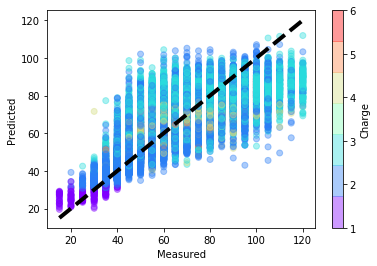

In [35]:
#fig,ax = plt.subplots()     #creates a figure wiht only one subplot

import matplotlib.pyplot as plt
plt.scatter(y2, y2_model, c = X2['Charge'], alpha= 0.4,
           cmap=plt.cm.get_cmap('rainbow', 7))

plt.colorbar(label='Charge', ticks=range(7))


plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X2, y2, cv=5)
scores.shape

(5,)

In [37]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#When just using the Length and charge this is 54% +/- 1%
#Plug in the Normalized Counts as well, goes up to 62% +/- 1%

Accuracy: 0.62 (+/- 0.01)


Not exactly stellar

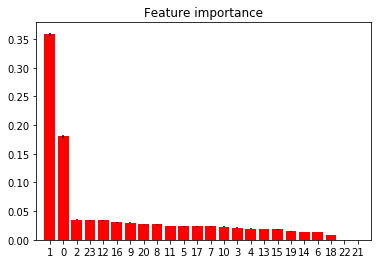

In [87]:
#Make array of feature importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#Plot the feature importances of our model
plt.figure()
plt.title("Feature importance")
plt.bar(range(X1.shape[1]), importances[indices], color='r', yerr=std[indices], align = "center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()

In [88]:
X1.columns

Index(['Charge', 'Length.x', 'A.Norm', 'R.Norm', 'N.Norm', 'D.Norm', 'C.Norm',
       'Q.Norm', 'E.Norm', 'G.Norm', 'H.Norm', 'I.Norm', 'L.Norm', 'K.Norm',
       'M.Norm', 'F.Norm', 'S.Norm', 'T.Norm', 'W.Norm', 'Y.Norm', 'V.Norm',
       'U.Norm', 'O.Norm', 'P.Norm'],
      dtype='object')

In [90]:
#A little array arithmetic
a = np.array([1, 1, 3, 4])
b = np.array([2, 3, 3, 5])
c = np.absolute(b-a)
#c = np.sqrt(np.square(b - a))
c
X2.columns

Index(['Charge', 'Length.x', 'A.Norm', 'R.Norm', 'N.Norm', 'D.Norm', 'C.Norm',
       'Q.Norm', 'E.Norm', 'G.Norm', 'H.Norm', 'I.Norm', 'L.Norm', 'K.Norm',
       'M.Norm', 'F.Norm', 'S.Norm', 'T.Norm', 'W.Norm', 'Y.Norm', 'V.Norm',
       'U.Norm', 'O.Norm', 'P.Norm'],
      dtype='object')

In [69]:
model_error.shape

(32971,)

In [93]:
type(y2)
model_error = np.absolute(y2_model - y2)
model_error.shape

combined_df = pd.DataFrame(X2)
combined_df["y2"] = y2
combined_df["y2_model"] = y2_model
combined_df["model_error"] = model_error
combined_df.columns


Index(['Charge', 'Length.x', 'A.Norm', 'R.Norm', 'N.Norm', 'D.Norm', 'C.Norm',
       'Q.Norm', 'E.Norm', 'G.Norm', 'H.Norm', 'I.Norm', 'L.Norm', 'K.Norm',
       'M.Norm', 'F.Norm', 'S.Norm', 'T.Norm', 'W.Norm', 'Y.Norm', 'V.Norm',
       'U.Norm', 'O.Norm', 'P.Norm', 'y2', 'y2_model', 'model_error'],
      dtype='object')

In [94]:
combined_df.to_csv("FeaturesMaxCV_withErr.csv")

### Trying to decompose the aa counts to lower dimensionality

In [19]:
# select and decompose normalized count data
normalized_aa_counts = ['A.Norm', 'R.Norm',
       'N.Norm', 'D.Norm', 'C.Norm', 'Q.Norm', 'E.Norm', 'G.Norm', 'H.Norm',
       'I.Norm', 'L.Norm', 'K.Norm', 'M.Norm', 'F.Norm', 'S.Norm', 'T.Norm',
       'W.Norm', 'Y.Norm', 'V.Norm', 'U.Norm', 'O.Norm', 'P.Norm']

normalized_count_df = evidence_df[normalized_aa_counts]

In [57]:
from sklearn.decomposition import PCA
# reduce dimensionality or normalized AA counts with PCA
pca = PCA(n_components=10)                              #defining pca method parameters
decomposed_df = pca.fit_transform(normalized_count_df)
type(decomposed_df)

numpy.ndarray

In [76]:
# concat decomposed values with length, charge
recombined_df = pd.concat([evidence_df[['Max Intensity CV', 'Length.x', 'Charge']]
    , pd.DataFrame(decomposed_df)], axis=1)

(164854, 13)

In [24]:
# set target value and create training data
target_value = ['Max Intensity CV']
# exclude target value (first column) from prepared feature matrix
X = recombined_df[recombined_df.columns[1:]]
y = recombined_df[target_value]

In [25]:
#split the data with 50% in each set
dX1, dX2, dy1, dy2 = train_test_split(X, y, random_state=0, train_size=0.8)

#Flatten the vector so that it is formatted correctly
dy1 = dy1.values.ravel()
dy2 = dy2.values.ravel()

C:\Users\jmcketney.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
# set hyperparameters and fit model
forest = RandomForestRegressor(200)
forest.fit(dX1, dy1)

# make predictions based on fitted model
dy2_model = forest.predict(dX2)
#predicted = cross_val_predict(forest1, X1, y1, cv=5, n_jobs=-1)

Evaluating the pca decomposed model

In [27]:
# evaluate performance with RMSE
np.sqrt(mean_squared_error(dy2, dy2_model))

11.98613715015591

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, dX2, dy2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.01)


Text(0,0.5,'Predicted')

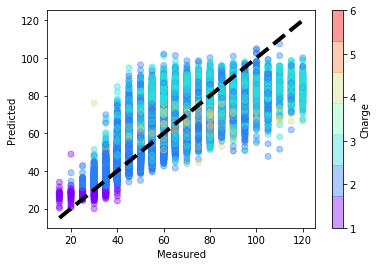

In [28]:
plt.scatter(dy2, dy2_model, c = dX2['Charge'], alpha= 0.4,
           cmap=plt.cm.get_cmap('rainbow', 7))

plt.colorbar(label='Charge', ticks=range(7))


plt.plot([dy2.min(), dy2.max()], [dy2.min(), dy2.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')